In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt','r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
# build the vocabulary of characters and mapping to\from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [4]:
# build the dataset
block_size = 3
X, Y = [], []

for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
       # print(''.join(itos[i] for i in context),'---->', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X) # X是例子
Y = torch.tensor(Y) # Y是标签 

In [23]:
# build the dataset

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [5]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [6]:
C = torch.randn((27,2))

In [7]:
emb = C[X]
emb.shape # 32:有32个例子， 3：我们目前的神经网络有3个神经元， 2：每个神经元有两个权重

torch.Size([228146, 3, 2])

In [8]:
W1 = torch.randn(6 ,100)
b1 = torch.randn(100)

In [9]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [10]:
h

tensor([[ 0.9999,  0.9996,  0.9999,  ...,  0.0475,  0.9998,  0.8556],
        [ 1.0000,  0.9965,  1.0000,  ...,  0.9259,  0.9594, -0.9604],
        [ 1.0000,  0.9666,  0.9101,  ...,  0.9984, -0.7968, -1.0000],
        ...,
        [-1.0000, -0.9679, -0.9999,  ..., -0.3295, -0.9651,  0.9999],
        [-1.0000, -0.9870,  0.8894,  ...,  0.2059, -0.9989,  0.4944],
        [-0.9751, -0.3747, -0.9996,  ...,  0.9729, -0.9512,  0.9405]])

In [11]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [12]:
logits = h @ W2 + b2

In [13]:
count = logits.exp()

In [14]:
prob = count / count.sum(1, keepdim=True)
prob

tensor([[1.1092e-01, 2.5461e-08, 2.5470e-09,  ..., 1.7094e-07, 1.4805e-05,
         2.8226e-14],
        [9.8548e-01, 4.4738e-14, 1.1499e-11,  ..., 6.3180e-10, 4.4877e-07,
         4.6163e-16],
        [9.9953e-01, 2.3886e-09, 1.1469e-08,  ..., 1.1569e-06, 2.7749e-07,
         6.3359e-12],
        ...,
        [2.2519e-17, 3.3265e-05, 6.5622e-01,  ..., 2.5613e-10, 2.1927e-08,
         1.9075e-07],
        [1.0990e-14, 1.3610e-07, 9.8463e-04,  ..., 8.7031e-08, 5.4050e-08,
         3.0547e-10],
        [7.8445e-16, 5.0351e-06, 2.2526e-05,  ..., 8.8031e-11, 2.2215e-09,
         3.6878e-08]])

In [15]:
loss = -prob[torch.arange(32),Y].log().mean() # 将prob重新排列成32行，27列，然后取出每一行的Y对应的列，然后求平均值

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [32], [228146]

In [ ]:
loss

In [ ]:
# ---------------------------------

In [16]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [17]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [18]:
sum(p.nelement() for p in parameters) # 计算参数的数量

3481

In [19]:
for p in parameters:
    p.requires_grad = True

In [20]:
lre = torch.linspace(-3, 0 ,1000)
lrs = 10**lre

In [28]:
lri = []
lossi = []

for i in range(3000):
    
    # minibatch construction
    ix = torch.randint(0, Xtr.shape[0], (32,))
    
    # forward pass
    emb = C[Xtr[ix]] # 32, 3, 2
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32, 100
    logits = h @ W2 + b2 # 32, 27
    # count = logits.exp()
    # prob = count / count.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None # 清空梯度
    loss.backward()
    
    # update weights
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
        
    # track loss and lr
    lri.append(lr)
    lossi.append(loss.item())
    
print(loss.item())
# 这里我们可以看到loss很小，说明我们的模型已经收敛了，但之所以很好是因为我们只训练了32个例子
# 我们有3481个参数，而只有32个例子，所以我们的模型很容易过拟合
# 而我们之所以达不到0，是因为我们前面的例子，例子中 ...的下一个既可以是e，也可以是h，也可以是其他，所以这里我们loss达不到0

2.2661385536193848


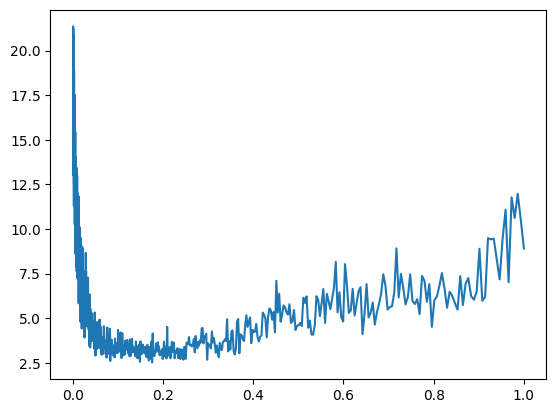

In [22]:
plt.plot(lri, lossi)

In [29]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.452327251434326